# SETUP

The first part of the code sets up the pca_wavelet network, the training comes later. Most of this code comes from the original authors

In [1]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os

GPU device not found
Found GPU at: 


In [2]:
tf.keras.backend.set_floatx("float64")

In [3]:
loader = dl.DataLoader(IMAGE_SIZE=128)
img_train,img_test = loader.import_processed_img()
seg_train,seg_test = loader.import_processed_seg()
combined_train, combined_test = loader.import_processed_combined()

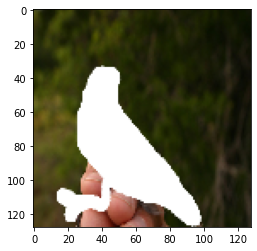

In [4]:
plt.imshow((next(iter(seg_train))[0]))

In [5]:
broker = mb.ModelBroker()
#seghead,seginvhead = broker.build_model(seg_train,seg_test,dirname="bird_seg",keep_percent=0.3,count=2,samplesize=100)
seghead,seginvhead = broker.load_model(seg_train,seg_test,dirname="bird_seg",keep_percent=0.3,count=2)
#imghead,imginvhead = broker.build_model(img_train,img_test,dirname="bird_img",keep_percent=0.3,count=2,samplesize=100)
imghead,imginvhead = broker.load_model(img_train,img_test,dirname="bird_img",keep_percent=0.3,count=2)

keep_percent 0.2434322477800738
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1


C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filezhbwuazi.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_first'), if_body, else_body, get_state, set_state, ('pad',), 1)
C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filezhbwuazi.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_last'), if_body_1, else_body_1, get_state_1, set_state_1, ('pad',), 1)


Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
sample.shape (128, 128, 3)
after reshape: sample.shape (1, 128, 128, 3)
loading from: models/bird_seg
out.shape (1, 32, 32, 13)
keep_percent 0.2434322477800738
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
sample.shape (128, 128, 3)
after reshape: sample.shape (1, 128, 128, 3)
loading from: models/bird_img
out.shape (1, 32, 32, 13)


sample.shape (128, 128, 3)
array([[[0.21176471, 0.35508579, 0.19534314],
        [0.26979169, 0.40312502, 0.29724267],
        [0.29828432, 0.41593137, 0.30612746],
        ...,
        [0.32469365, 0.45986521, 0.24129902],
        [0.3019608 , 0.44344363, 0.21740197],
        [0.24987745, 0.39105392, 0.15183824]],

       [[0.20888481, 0.34828433, 0.20814951],
        [0.25802699, 0.39136031, 0.29724267],
        [0.29620099, 0.41384804, 0.3197304 ],
        ...,
        [0.29019609, 0.42745098, 0.20992647],
        [0.24454656, 0.39215687, 0.17285539],
        [0.22745098, 0.36470589, 0.14080884]],

       [[0.18321079, 0.32261032, 0.18425246],
        [0.23308824, 0.36642158, 0.27089462],
        [0.27763483, 0.39136031, 0.30508581],
        ...,
        [0.24810049, 0.37855393, 0.1911152 ],
        [0.23026961, 0.36973041, 0.18100491],
        [0.22389705, 0.36115196, 0.14154412]],

       ...,

       [[0.37830883, 0.48774511, 0.36617649],
        [0.22873774, 0.41758579, 0.109375

array([[[0.21176471, 0.35508579, 0.19534314],
        [0.26979169, 0.40312502, 0.29724267],
        [0.29828432, 0.41593137, 0.30612746],
        ...,
        [0.32469365, 0.45986521, 0.24129902],
        [0.3019608 , 0.44344363, 0.21740197],
        [0.24987745, 0.39105392, 0.15183824]],

       [[0.20888481, 0.34828433, 0.20814951],
        [0.25802699, 0.39136031, 0.29724267],
        [0.29620099, 0.41384804, 0.3197304 ],
        ...,
        [0.29019609, 0.42745098, 0.20992647],
        [0.24454656, 0.39215687, 0.17285539],
        [0.22745098, 0.36470589, 0.14080884]],

       [[0.18321079, 0.32261032, 0.18425246],
        [0.23308824, 0.36642158, 0.27089462],
        [0.27763483, 0.39136031, 0.30508581],
        ...,
        [0.24810049, 0.37855393, 0.1911152 ],
        [0.23026961, 0.36973041, 0.18100491],
        [0.22389705, 0.36115196, 0.14154412]],

       ...,

       [[0.37830883, 0.48774511, 0.36617649],
        [0.22873774, 0.41758579, 0.10937501],
        [0.22769608, 0

pred.shape (1, 32, 32, 13)
recon.shape (128, 128, 3)


sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  20.80328771908632
ncc =  [[1.         0.95156892]
 [0.95156892 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.33756128 0.27947307 0.27236521 0.25428921]
 [0.30085784 0.27879903 0.29056373 0.28376228]
 [0.33223039 0.32726717 0.33259806 0.30306375]
 [0.35968137 0.37506127 0.35545343 0.32236519]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.36699767 0.30542865 0.28934284 0.26582744]
 [0.32407837 0.27038832 0.28043079 0.27379231]
 [0.35708589 0.31584735 0.32516344 0.30227387]
 [0.38584653 0.33994794 0.35725298 0.30594454]], shape=(4, 4), dtype=float64)


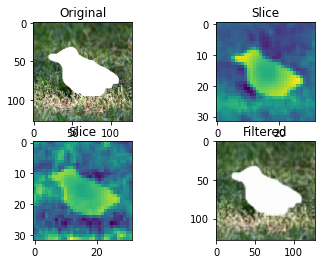

In [77]:
broker.check_build(seghead,seginvhead,seg_test)

sample.shape (128, 128, 3)
array([[[0.14233902, 0.16623607, 0.09638313],
        [0.17224266, 0.19215687, 0.12633799],
        [0.17098245, 0.18666872, 0.1278452 ],
        ...,
        [0.04407313, 0.05441871, 0.03314257],
        [0.03584583, 0.04972427, 0.02810466],
        [0.07013538, 0.09288354, 0.07648925]],

       [[0.16740173, 0.18415001, 0.11429731],
        [0.16328079, 0.18347144, 0.12472427],
        [0.16856737, 0.17641051, 0.12150855],
        ...,
        [0.03441114, 0.05977879, 0.03232781],
        [0.01568628, 0.03670343, 0.02101716],
        [0.07146666, 0.08505931, 0.07652181]],

       [[0.17608069, 0.19820078, 0.12940627],
        [0.16862746, 0.17647059, 0.12408089],
        [0.16576503, 0.18145131, 0.12262776],
        ...,
        [0.05675958, 0.07059542, 0.04315257],
        [0.03171937, 0.04707534, 0.02495404],
        [0.03167054, 0.03957352, 0.02421588]],

       ...,

       [[0.24921182, 0.28840238, 0.15115584],
        [0.24062499, 0.27984071, 0.146492

array([[[0.14233902, 0.16623607, 0.09638313],
        [0.17224266, 0.19215687, 0.12633799],
        [0.17098245, 0.18666872, 0.1278452 ],
        ...,
        [0.04407313, 0.05441871, 0.03314257],
        [0.03584583, 0.04972427, 0.02810466],
        [0.07013538, 0.09288354, 0.07648925]],

       [[0.16740173, 0.18415001, 0.11429731],
        [0.16328079, 0.18347144, 0.12472427],
        [0.16856737, 0.17641051, 0.12150855],
        ...,
        [0.03441114, 0.05977879, 0.03232781],
        [0.01568628, 0.03670343, 0.02101716],
        [0.07146666, 0.08505931, 0.07652181]],

       [[0.17608069, 0.19820078, 0.12940627],
        [0.16862746, 0.17647059, 0.12408089],
        [0.16576503, 0.18145131, 0.12262776],
        ...,
        [0.05675958, 0.07059542, 0.04315257],
        [0.03171937, 0.04707534, 0.02495404],
        [0.03167054, 0.03957352, 0.02421588]],

       ...,

       [[0.24921182, 0.28840238, 0.15115584],
        [0.24062499, 0.27984071, 0.14649203],
        [0.23244485, 0

pred.shape (1, 32, 32, 13)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  28.18776731962871
ncc =  [[1.         0.97605797]
 [0.97605797 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.38981265 0.3876532  0.41869879 0.42455602]
 [0.39039522 0.40158117 0.42314646 0.42709866]
 [0.41480282 0.42572334 0.42959559 0.42493874]
 [0.43411437 0.43999693 0.42935577 0.43534008]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.41163455 0.38837659 0.43424143 0.43198525]
 [0.39925384 0.38138988 0.41682666 0.40451615]
 [0.42485323 0.42159769 0.44581531 0.42232294]
 [0.41835204 0.41642226 0.44410816 0.40668618]], shape=(4, 4), dtype=float64)


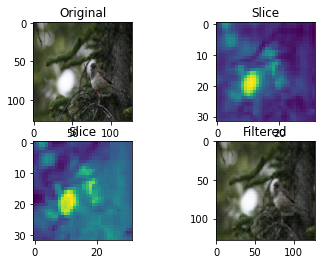

In [78]:
broker.check_build(imghead,imginvhead,img_test)

# Training

This is the loop used to find the variables to find A and b in y=Ax+b

In [80]:
shape = imghead(next(iter(img_train))).shape

In [108]:
shape_0 = shape[3]
shape_1 = shape[1]*shape[2]
shape_2 = shape[1]

In [31]:
reconstruct = next(iter(seg_train))[0].shape

In [115]:
n = 0.0


xxt = np.zeros([shape_0,shape_0])
yxt = np.zeros([shape_0,shape_0])
x = np.ones([shape_1])
x_m = np.zeros([shape_0])
y = np.ones([shape_1]) 
y_m = np.zeros([shape_0])

bar = tqdm.notebook.tqdm(total = int(combined_train.cardinality()))

for item in iter(combined_train):
    bar.update(1)
    image = item[0][0]
    segmentation = item[0][1]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1,imgdecom.shape[-1]])
    segmat = tf.reshape(segdecom,[-1,imgdecom.shape[-1]])
    
    cov = tf.tensordot(mat,mat,[0,0])
    xxt += cov
    #del cov
    
    segcov = tf.tensordot(mat,segmat,[0,0])
    yxt += segcov
    #del segcov
    
    x_m += tf.linalg.matvec(mat,x,transpose_a=True)
    y_m += tf.linalg.matvec(segmat,y,transpose_a=True)
    
    n += 1

  0%|          | 0/3000 [00:00<?, ?it/s]

InvalidArgumentError: Incompatible shapes: [1024] vs. [1024,13] [Op:AddV2]

In [103]:
directory = "pca_vars/"+"seg2img"
if not os.path.exists(directory):
    os.makedirs(directory)

In [104]:
np.save(directory+"/xxt",xxt)
np.save(directory+"/yxt",yxt)
np.save(directory+"/x_m",x_m)
np.save(directory+"/y_m",y_m)
np.save(directory+"/n",n)

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [105]:
xxt = np.load(directory+"/xxt.npy")
yxt = np.load(directory+"/yxt.npy")
x_m = np.load(directory+"/x_m.npy")
y_m = np.load(directory+"/y_m.npy")
n = np.load(directory+"/n.npy")

In [106]:
xxt = (xxt - tf.tensordot(x_m,x_m,0))/n
yxt = (yxt - tf.tensordot(x_m,y_m,0))/n

InvalidArgumentError: Incompatible shapes: [13,13] vs. [1024,1024] [Op:Sub]

In [ ]:
inverse_xxt = tf.linalg.pinv(xxt)

In [ ]:
A = tf.reduce_sum(tf.tensordot(inverse_xxt,yxt,[0,0]),0)/n

In [ ]:
b = (y_m - A*x_m)/n

In [ ]:
img_train, img_test = loader.import_processed_img()

In [ ]:
image,seg_base = next(iter(combined_test.shuffle(100)))[0]
imgdecom = imghead(image)
imgdecom = tf.reshape(imgdecom,(-1,shape_0))
y = A*imgdecom + b
seg = seginvhead(tf.reshape(y,(1,shape_2,shape_2,shape_0)))
#seg = tf.reshape(np.repeat(tf.reduce_max(seg[0],2),3),(reconstruct))
plt.imshow(np.hstack([image,seg_base,seg[0]]))

In [73]:
seg

<tf.Tensor: shape=(1, 128, 128, 3), dtype=float64, numpy=
array([[[[-10744.01384442,  -7476.27748969,  -9812.4269712 ],
         [-10328.15915409,  -7132.31882694,  -9415.12017749],
         [-10669.62898411,  -7404.29226015,  -9732.03405611],
         ...,
         [-10297.38789824,  -7101.74519789,  -9379.77700256],
         [-10611.49629827,  -7346.59342349,  -9665.9627265 ],
         [-10062.16701195,  -6868.2651189 ,  -9119.63699822]],

        [[-10380.53073731,  -7159.29444535,  -9453.96432007],
         [-10042.19244813,  -6884.37982058,  -9129.75449218],
         [-10320.76795471,  -7101.90799557,  -9388.76978628],
         ...,
         [-10018.63518629,  -6861.01391399,  -9101.94586937],
         [-10275.99156694,  -7057.5579195 ,  -9336.64310857],
         [ -9827.90327602,  -6671.97416329,  -8888.22698106]],

        [[-10698.05637122,  -7431.05335971,  -9764.69192162],
         [-10287.52385423,  -7092.36865912,  -9373.05849112],
         [-10623.57107049,  -7359.06113272